In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Data%20Science%20Jobs%20Salaries%20Dataset/Data%20Science%20Jobs%20Salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S


In [3]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           245 non-null    object
 1   experience_level    245 non-null    object
 2   employment_type     245 non-null    object
 3   job_title           245 non-null    object
 4   salary              245 non-null    int64 
 5   salary_currency     245 non-null    object
 6   salary_in_usd       245 non-null    int64 
 7   employee_residence  245 non-null    object
 8   remote_ratio        245 non-null    int64 
 9   company_location    245 non-null    object
 10  company_size        245 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.2+ KB


In [5]:
df["work_year"]

0      2021e
1       2020
2      2021e
3      2021e
4      2021e
       ...  
240     2020
241    2021e
242     2020
243     2020
244    2021e
Name: work_year, Length: 245, dtype: object

In [6]:
df["work_year"] = df["work_year"].str.replace(r'[\D\s]', '').astype(int)
df["work_year"].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0    2021
1    2020
2    2021
3    2021
4    2021
Name: work_year, dtype: int64

In [7]:
df['job_title'].nunique()

43

In [8]:
df['salary_in_usd']

0       64369
1       68428
2       85000
3      230000
4      125000
        ...  
240    412000
241    151000
242    105000
243    100000
244     94917
Name: salary_in_usd, Length: 245, dtype: int64

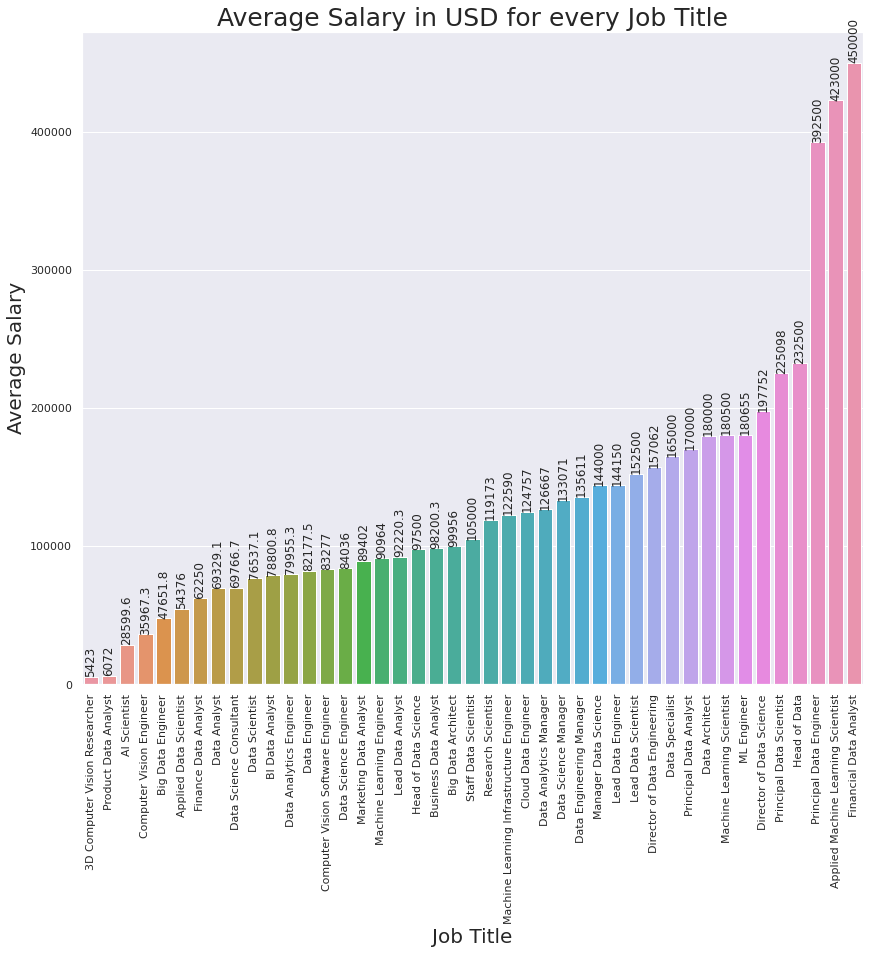

In [9]:
sns.set()
job_salary_usd = df[['job_title', 'salary_in_usd']]
job_salary_usd = job_salary_usd.groupby('job_title').mean()['salary_in_usd'].sort_values().reset_index()
fig = plt.figure(figsize=(14,12))
g = sns.barplot(x='job_title',
                y='salary_in_usd',
                data=job_salary_usd,
                ci=None)
g.bar_label(g.containers[0], rotation=90)
plt.ylabel("Average Salary", size=20)
plt.xlabel('Job Title', size=20)
plt.xticks(rotation=90)
plt.title("Average Salary in USD for every Job Title", size=25);

In [10]:
df['salary_currency'].nunique()

15

In [11]:
df['salary_currency'].unique()

array(['EUR', 'USD', 'CAD', 'INR', 'PLN', 'GBP', 'HUF', 'SGD', 'MXN',
       'TRY', 'CLP', 'JPY', 'DKK', 'CNY', 'BRL'], dtype=object)

In [12]:
job_inr = df[df['salary_currency'] == 'INR']
job_inr = job_inr.groupby('job_title').mean()['salary'].sort_values().reset_index()
job_inr.head()

,job_title,salary
0,3D Computer Vision Researcher,4.000000e+05
1,Data Science Consultant,4.230000e+05
2,Data Analyst,4.500000e+05
3,Product Data Analyst,4.500000e+05
4,Big Data Engineer,1.102333e+06


In [13]:
job_jpy = df[df['salary_currency'] == 'JPY']
job_jpy

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
169,2020,EN,FT,Data Engineer,4450000,JPY,41689,JP,100,JP,S


In [14]:
job_eur = df[df['salary_currency'] == 'EUR']
job_eur = job_eur.groupby('job_title').mean()['salary'].sort_values(ascending=False).reset_index()
job_eur.head()

,job_title,salary
0,Principal Data Scientist,138500.0
1,Director of Data Science,125000.0
2,Big Data Engineer,100000.0
3,Computer Vision Software Engineer,81000.0
4,Marketing Data Analyst,75000.0


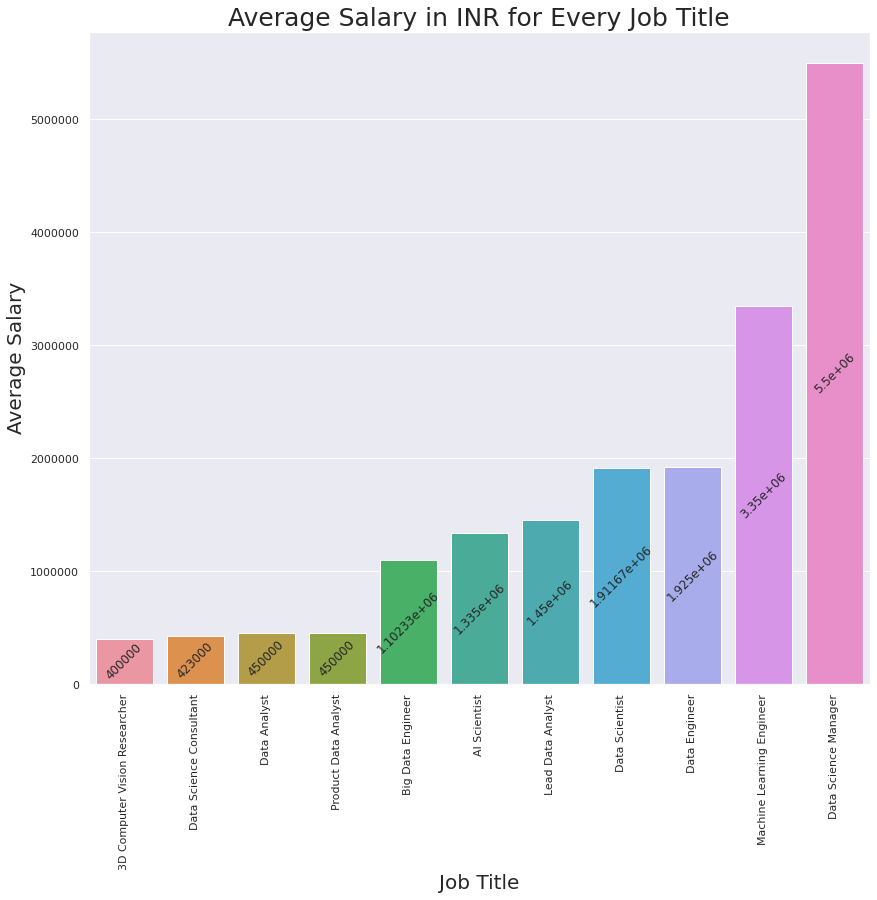

In [15]:
fig = plt.figure(figsize=(14,12))
g = sns.barplot(x='job_title',
            y='salary',
            data=job_inr,
            ci=None)
g.bar_label(g.containers[0], rotation=45, label_type='center')
g.yaxis.get_major_formatter().set_scientific(False)
g.yaxis.get_major_formatter().set_useOffset(False)
plt.xlabel("Job Title", size=20)
plt.ylabel("Average Salary", size=20)
plt.title("Average Salary in INR for Every Job Title", size=25)
plt.xticks(rotation=90);

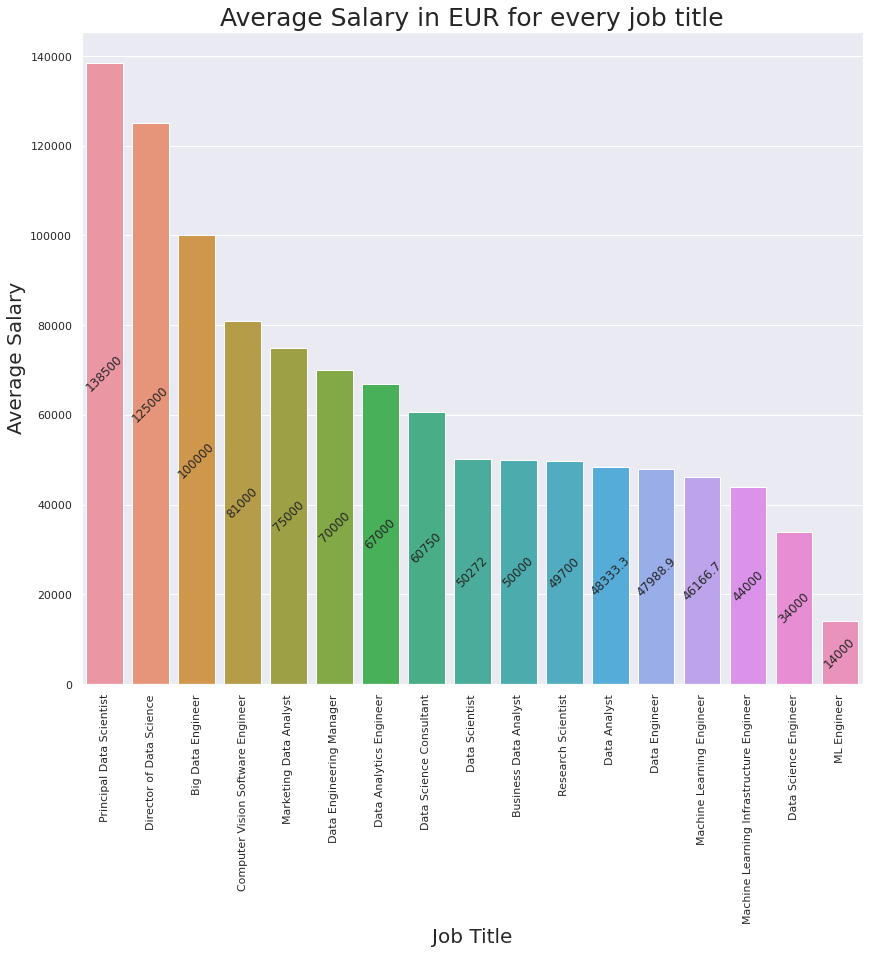

In [16]:
fig = plt.figure(figsize=(14,12))
g = sns.barplot(x='job_title',
                y='salary',
                data=job_eur,
                ci=None)
g.bar_label(g.containers[0],rotation=45,label_type='center')
plt.xlabel("Job Title", size=20)
plt.ylabel("Average Salary", size=20)
plt.xticks(rotation=90)
plt.title("Average Salary in EUR for every job title", size=25);


In [17]:
com_loc = df.groupby('company_location').size().sort_values(ascending=False)
com_loc.head()

company_location
US    108
DE     19
IN     17
GB     16
FR     11
dtype: int64

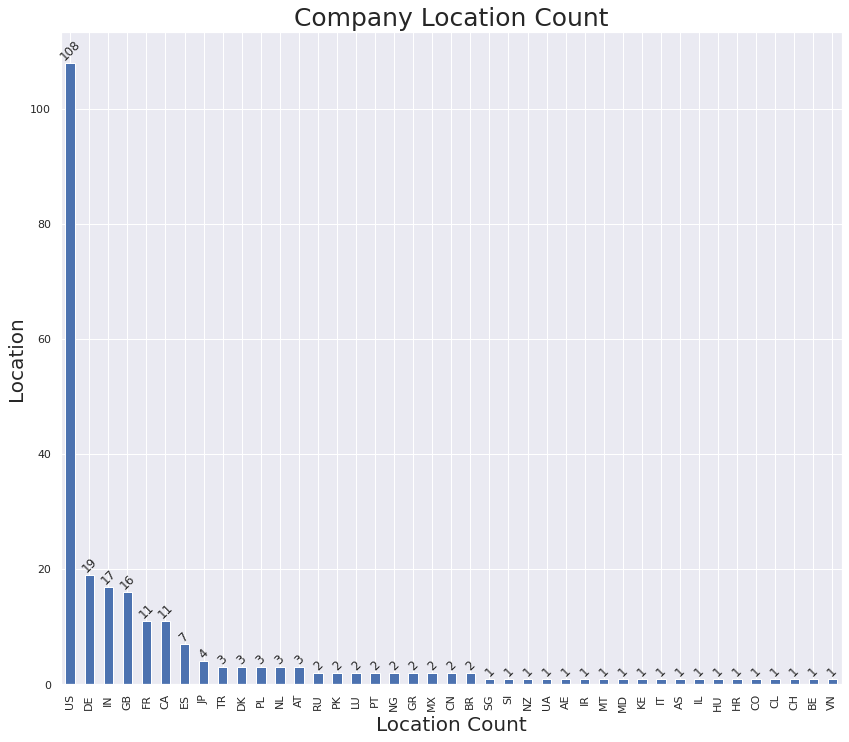

In [18]:
fig = plt.figure(figsize=(14,12))
g = com_loc.plot(kind='bar')
g.bar_label(g.containers[0],rotation=45)
plt.xlabel("Location Count", size=20)
plt.ylabel('Location', size=20)
plt.title("Company Location Count", size=25)
plt.show()

In [19]:
com_size = df.groupby('company_size').size().sort_values(ascending=False)
com_size.head()

company_size
L    132
S     58
M     55
dtype: int64

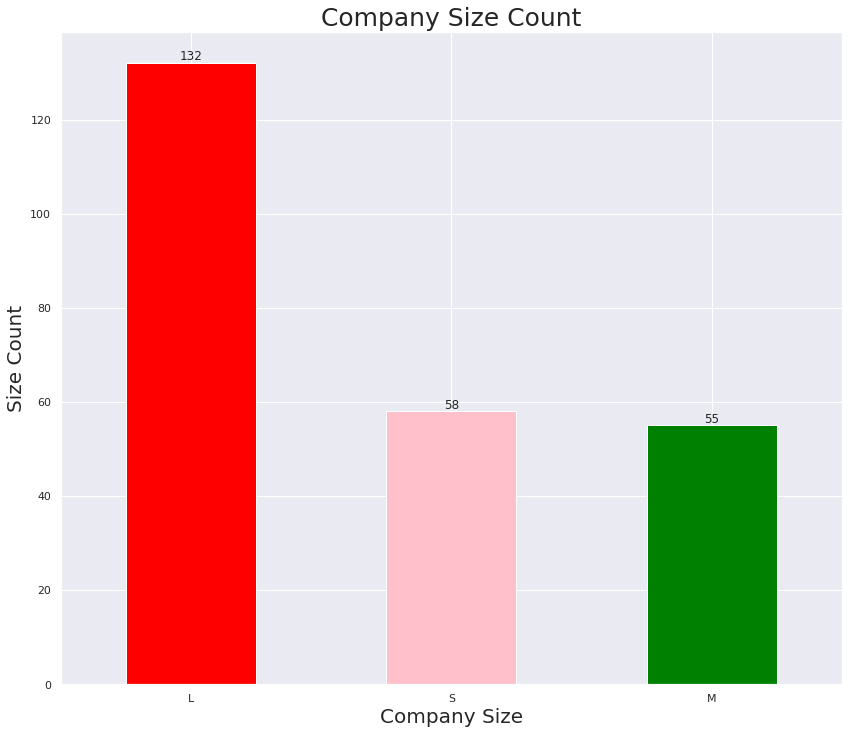

In [20]:
fig = plt.figure(figsize=(14,12))
g = com_size.plot(kind='bar', color=['Red', 'pink', 'Green'])
g.bar_label(g.containers[0])
plt.title("Company Size Count", size=25)
plt.xlabel('Company Size', size=20)
plt.ylabel('Size Count', size=20)
plt.xticks(rotation=0)
plt.show()